In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/SSL_Final/_1_CAMIL_/cleaned_dataset.csv")

X=data.drop(["PAN"], axis=1)
y=data[["PAN"]]


In [ ]:
X.drop(X.columns[X.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
X

,IPD_0,IPD_1,IPD_2,IPD_3,IPD_4,IPD_5,IPD_6,IPD_7,IPD_8,IPD_9,...,ITD_9990,ITD_9991,ITD_9992,ITD_9993,ITD_9994,ITD_9995,ITD_9996,ITD_9997,ITD_9998,ITD_9999
0,-0.544094,4.938703,0.234613,-0.908851,-0.386867,-0.134387,0.357472,1.247610,-5.967791,0.909338,...,-0.629222,-1.042184,5.067255,4.847328,4.656171,4.505492,4.531093,-1.921304,-1.833309,-1.986035
1,-0.468816,0.483668,0.071998,0.233507,-0.337696,0.353193,-0.122685,-0.180672,-0.270054,1.135773,...,-4.008468,1.094650,1.160942,-3.395287,-4.414398,-3.093710,-3.897199,-2.938854,-2.738269,-2.787830
2,0.706256,-0.227604,4.660610,-0.402345,-0.116852,-1.349487,-0.900332,1.174064,0.544445,-0.416250,...,5.071982,4.838185,4.922722,4.208443,-2.353620,-2.428252,-2.459001,-2.254551,-2.374817,-2.841554
3,0.541630,0.274506,0.115061,-0.162721,-0.313164,0.481578,-0.235730,-0.277622,-0.342330,5.971813,...,-1.599823,-0.934292,-1.715517,-0.919449,-1.282167,-0.840167,-0.600043,-0.199898,-0.790518,-0.753680
4,-0.402944,-0.553763,-0.580419,-0.443680,-1.490989,5.361196,-0.979572,-0.065393,-0.453416,-0.736993,...,-0.865850,1.353790,0.500374,0.782515,1.238288,0.980058,0.689575,0.534705,0.949035,0.764862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,0.057100,0.135546,0.141784,0.148666,-0.067635,-1.113187,-0.117334,0.303487,-0.792319,-0.201019,...,-0.589387,-0.817261,-1.254684,-1.275346,-1.274788,-1.513939,-0.692203,-2.178653,-1.581774,-2.637259
5001,0.346885,-5.083886,0.145124,-4.884477,-0.286784,-0.256891,-0.101270,0.032727,-0.108285,-0.584233,...,2.899396,3.281554,-2.750413,-2.434401,-2.758217,-2.384917,-2.328357,-1.998103,-1.849434,-1.910019
5002,0.030749,0.238819,1.866337,-0.738736,-0.080345,-0.024561,0.289336,-0.007093,-0.092194,0.121095,...,-2.078512,3.567053,-2.455758,-2.541368,-2.251606,-2.275836,-1.966743,-1.743971,-1.441062,-1.966912
5003,0.026646,0.146140,0.818474,0.101115,0.066968,0.025460,0.132081,0.008144,-0.145694,0.022579,...,1.125106,1.237092,-4.948829,0.985280,-4.988161,-4.740637,-4.842017,-4.662255,-4.787058,-5.000927


In [ ]:
y

,PAN
0,Class 10
1,Class 10
2,Class 10
3,Class 10
4,Class 10
...,...
5000,Class 17
5001,Class 17
5002,Class 17
5003,Class 17


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 1: Preprocess data
# Use LabelEncoder to encode your class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Reshape data for 1D CNN
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Dropout

In [ ]:
# Step 2: Build the 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Adjust dropout rate as needed
model.add(Dense(50, activation='relu'))
model.add(Dense(18, activation='softmax'))  # Assuming 5 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19998, 64)         256       
                                                                 
 batch_normalization (Batch  (None, 19998, 64)         256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 9999, 64)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 9997, 128)         24704     
                                                                 
 batch_normalization_1 (Bat  (None, 9997, 128)         512       
 chNormalization)                                                
                                                        

In [ ]:
# Empty ram
data=[]
X=[]
y=[]

In [ ]:
# Step 3: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 4: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/100
126/126 [==============================] - 27s 83ms/step - loss: 1.4281 - accuracy: 0.5962 - val_loss: 36.9158 - val_accuracy: 0.0709
Epoch 2/100
126/126 [==============================] - 10s 81ms/step - loss: 0.2751 - accuracy: 0.9371 - val_loss: 0.6967 - val_accuracy: 0.8292
Epoch 3/100
126/126 [==============================] - 9s 74ms/step - loss: 0.1055 - accuracy: 0.9795 - val_loss: 0.2279 - val_accuracy: 0.9131
Epoch 4/100
126/126 [==============================] - 10s 76ms/step - loss: 0.0559 - accuracy: 0.9883 - val_loss: 0.1807 - val_accuracy: 0.9151
Epoch 5/100
126/126 [==============================] - 10s 75ms/step - loss: 0.0599 - accuracy: 0.9873 - val_loss: 0.3057 - val_accuracy: 0.8881
Epoch 6/100
126/126 [==============================] - 10s 76ms/step - loss: 0.0347 - accuracy: 0.9940 - val_loss: 0.1788 - val_accuracy: 0.9381
Epoch 7/100
126/126 [==============================] - 10s 75ms/step - loss: 0.0315 - accuracy: 0.9945 - val_loss: 0.2308 - val_ac

In [ ]:
# Empty ram
X_train = []
y_train = []

In [ ]:
# Save the base model
drive_path = '/content/drive/MyDrive/SSL_Final/_1_CAMIL_/'
# Save the entire model (architecture + weights) to Google Drive
model.save(drive_path + 'SSL_model.keras')

In [ ]:
# Save the history
import pickle
import matplotlib.pyplot as plt

drive_path = '/content/drive/MyDrive/SSL_Final/_1_CAMIL_/'
history_filename = 'training_history.pkl'

with open(drive_path + history_filename, 'wb') as file:
    pickle.dump(history.history, file)


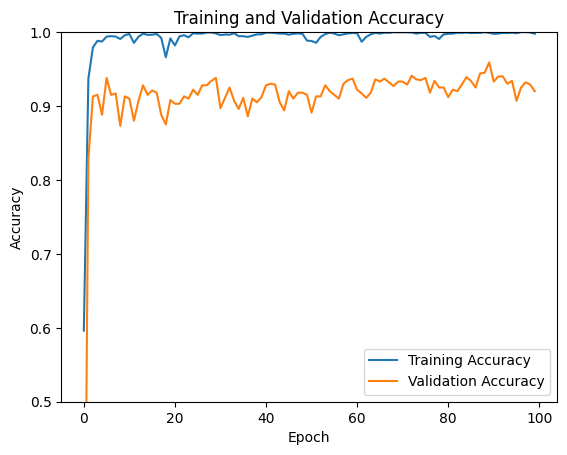

In [ ]:
# Load the training history from Google Drive
with open(drive_path + history_filename, 'rb') as file:
    loaded_history = pickle.load(file)

# Plot training and validation accuracy
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim(.5,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



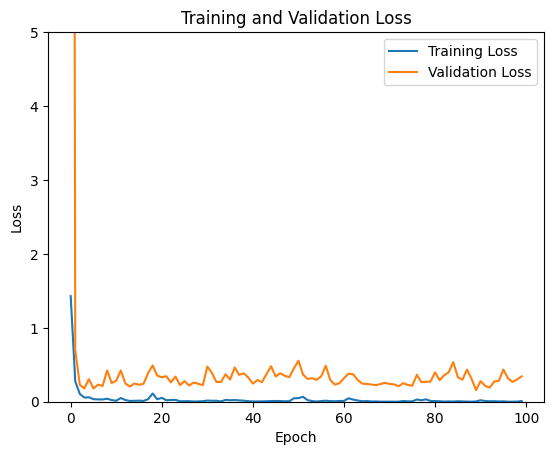

In [ ]:
# Plot training and validation loss
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylim(0, 5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save confusion matrix stuffs

In [ ]:
import pickle

# Save X_test and y_test
save_path = '/content/drive/MyDrive/SSL_Final/_1_CAMIL_/test_data.pkl'
with open(save_path, 'wb') as file:
    pickle.dump((X_test, y_test), file)



In [ ]:
# Load X_test and y_test back
with open(save_path, 'rb') as file:
    loaded_X_test, loaded_y_test = pickle.load(file)

In [ ]:
X_test = loaded_X_test

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data
# loaded_X_test: input features of your loaded test data
# loaded_y_test: true labels of your loaded test data

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

y_pred_labels

32/32 [==============================] - 1s 17ms/step


array([15,  3, 15, ...,  4, 14, 13])

In [ ]:
y_test  = loaded_y_test

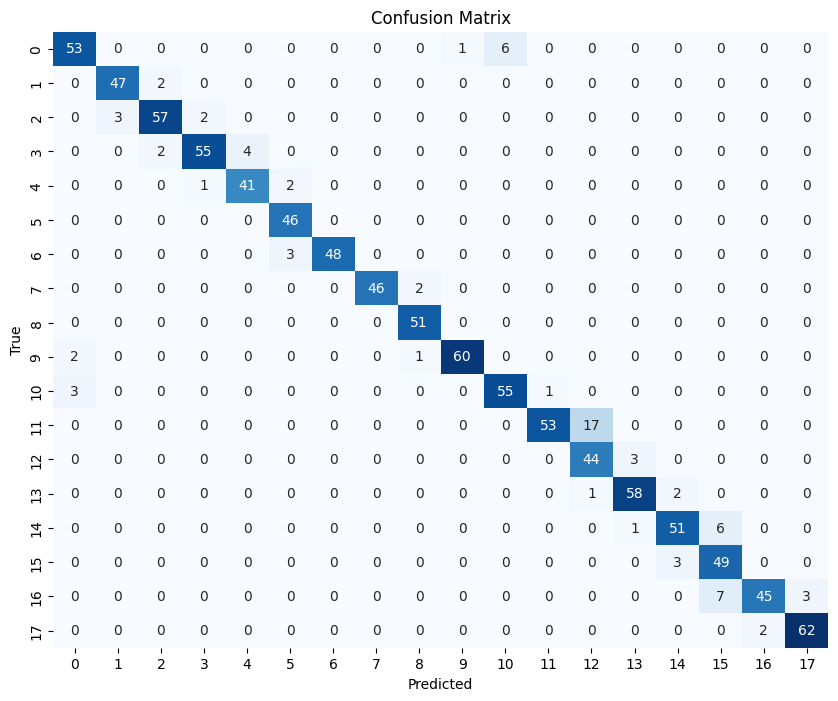

In [ ]:
loaded_y_true_labels = y_test

# Compute the confusion matrix
cm = confusion_matrix(loaded_y_true_labels, y_pred_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(cm.shape[1]), yticklabels=range(cm.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()